In [261]:
# Avocado Project

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline
#from sklearn.xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [106]:
df.shape

(18249, 14)

In [ ]:
# Exploratory Data Analysis
# Important Observations :
# The dataset comprises of 16468 observations of 14 columns.
# Description of features :

#Features        Description
#‘Unamed: 0’    :Its just a useless index feature that will be removed later
#‘Total Volume’ :Total sales volume of avocados
#‘4046’	        :Total sales volume of Small/Medium Hass Avocado
#‘4225’         :Total sales volume of Large Hass Avocado
#‘4770’	        :Total sales volume of Extra Large Hass Avocado
#‘Total Bags’   :Total number of Bags sold
#‘Small Bags’   :Total number of Small Bags sold
#‘Large Bags’   :Total number of Large Bags sold
#‘XLarge Bags’  :Total number of XLarge Bags sold

# Categorical: ‘region’,’type’
# Date: ‘Date’
# Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
# Target:‘AveragePrice’

# ‘Unamed: 0’ feature is useless,so we can remove it.


In [107]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
# 1)we do not find any missing values
# 2)Maximum features are of float type except Date,type,region

In [108]:
# # Statistical summary

df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Above description clearly shows that there are no missing values

In [262]:
# Removing 'Unnamed: 0','Date' from dataset

df.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

In [133]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


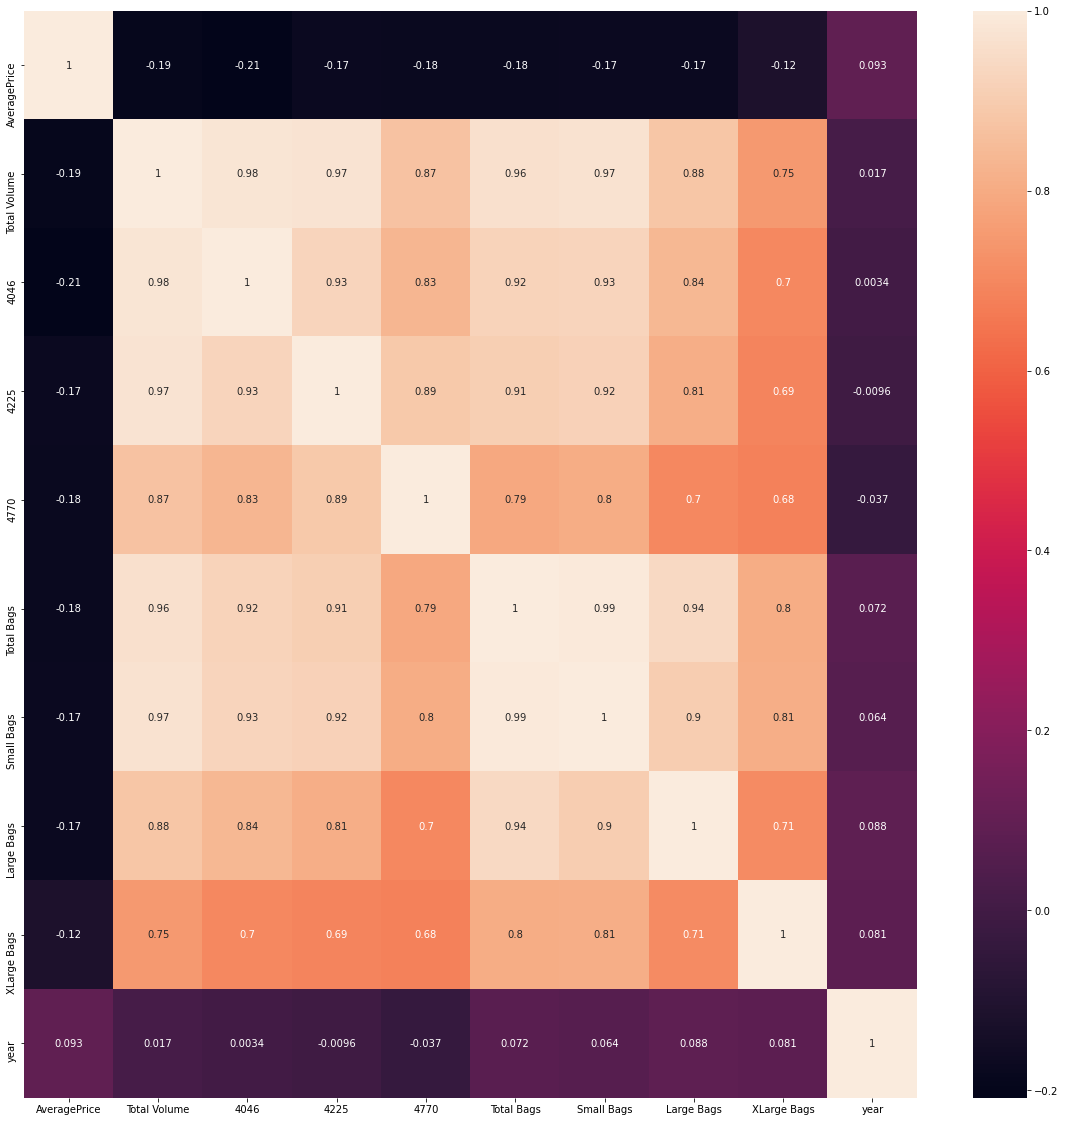

In [112]:
# checking correlation of independent variables with 'AveragePrice' variable

plt.figure(figsize=(20,20))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [111]:
corr_matrix['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
Name: AveragePrice, dtype: float64

In [ ]:
# Clearly from above not much correlation could be seen between 'AveragePrice' and other features,but relationship could
# be easily seen between different features

In [134]:
# Checking for categorical features

df['region'].nunique()

54

In [135]:
df['type'].nunique()

2

In [117]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [263]:
# converting categorical features into numerics

le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])

In [120]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [121]:
# checking skewness in dataset

df.skew().sort_values()

region           0.000030
type             0.000329
year             0.215339
AveragePrice     0.580303
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

In [264]:
# removing skewness from dataset

s=('Total Volume','Large Bags','Small Bags','Total Bags','4046','4770','4225','XLarge Bags')
for col in s:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [123]:
df.skew().sort_values()

Small Bags     -0.622148
Large Bags     -0.547765
4225           -0.486654
4046           -0.328195
Total Bags     -0.218874
region          0.000030
type            0.000329
Total Volume    0.088098
4770            0.099986
year            0.215339
AveragePrice    0.580303
XLarge Bags     1.176494
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

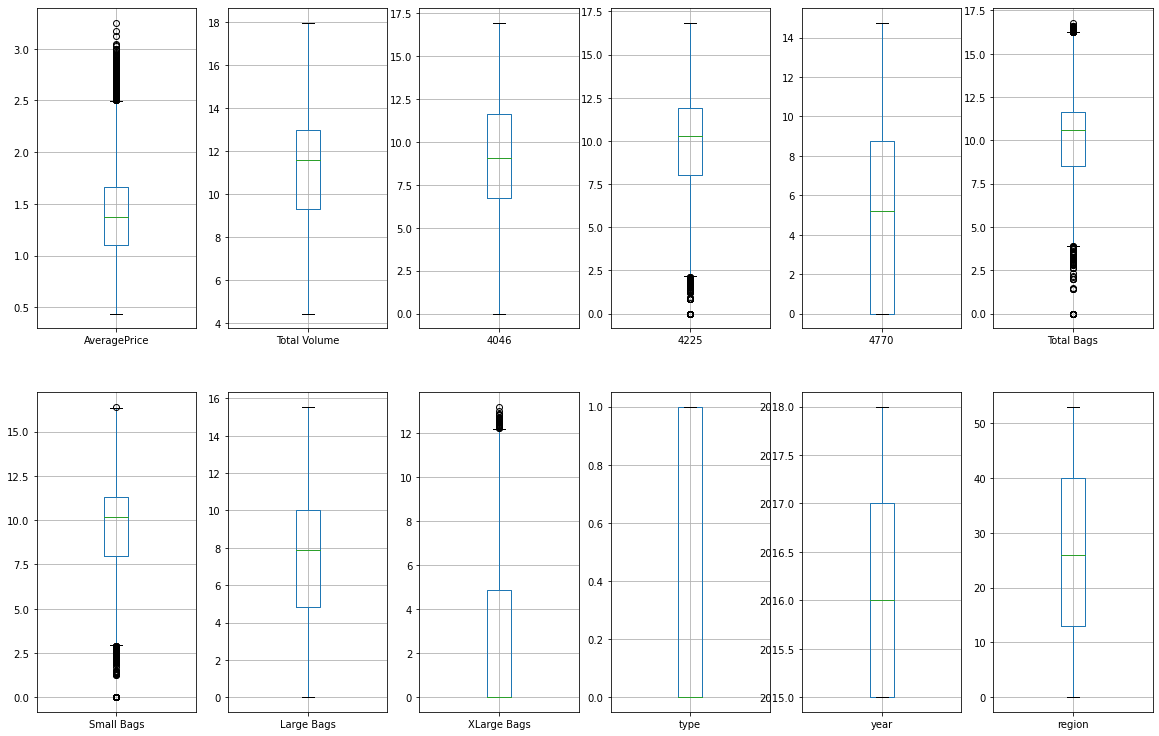

In [124]:
# plotting boxplot to check outliers

df.plot(kind='box', subplots=True, layout=(3,6), figsize=(20,20), grid=True)
plt.show

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

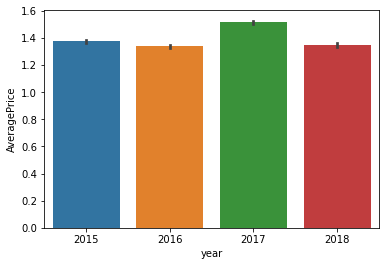

In [125]:
sns.barplot(x='year',y='AveragePrice',data=df)

In [ ]:
# Above plot shows that 'Average Price' for year '2017' is more than other years

In [265]:
# Detecting outlier and removing it

import numpy as np

from scipy import stats
df_outlier= df.copy()
z = np.abs(stats.zscore(df_outlier))
print(z)

[[0.18868864 0.10728205 0.60975177 ... 0.99983562 1.22128204 1.7002522 ]
 [0.13901962 0.1759487  0.73770703 ... 0.99983562 1.22128204 1.7002522 ]
 [1.18206895 0.15869039 0.68884013 ... 0.99983562 1.22128204 1.7002522 ]
 ...
 [1.15237477 0.77890112 0.56825116 ... 1.00016441 1.97050371 1.70081131]
 [1.30138182 0.70779758 0.49440715 ... 1.00016441 1.97050371 1.70081131]
 [0.53151208 0.67454176 0.30415101 ... 1.00016441 1.97050371 1.70081131]]


In [266]:
# Defining threshold to identify an outlier

threshold = 3
print(np.where(z < 3))

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))


In [267]:
df_outlier=df_outlier[(z < 3).all(axis=1)]
df.shape

(18249, 12)

In [206]:
df_outlier.shape

(17834, 12)

In [268]:
X=df_outlier.drop('AveragePrice',axis=1)
y=df_outlier.AveragePrice

In [269]:

# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X_features=X
X= scale.fit_transform(X)

In [149]:
# Evaluation of models

#Training model with DecisionTreeRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_dt = DecisionTreeRegressor()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    score=r2_score(y_test,y_pred_dt)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  6
best r2 score :  0.7081597568670167


In [152]:
# finding mean_squared_error,rmse  for DecisionTreeRegressor

mse=mean_squared_error(y_test,y_pred_dt)
rmse=np.sqrt(mse)

rmse

0.21070584671623058

In [ ]:
# rmse is coming to be low,so our model is good.plotting scatter plot to confirm

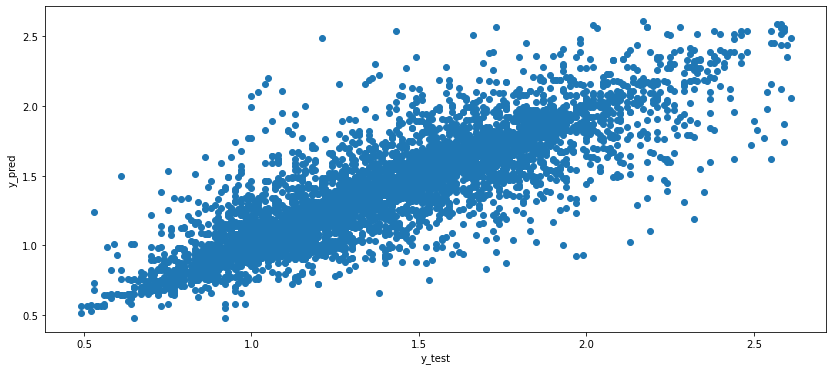

In [153]:
# # plotting original training data wth predicted values for DecisionTreeRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_dt)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
# The predicted values looks close enough to original values with We are getting a best fit line for DecisionTreeRegressor
# and we are getting a best fit line.So model seems to be doing good

In [156]:
# Evaluation of models

#Training model with LinearRegression and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_lr = LinearRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    score=r2_score(y_test,y_pred_lr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  20
best r2 score :  0.553383491689948


In [157]:
# finding mean_squared_error,rmse  for LinearRegression

mse=mean_squared_error(y_test,y_pred_lr)
rmse=np.sqrt(mse)

rmse

0.2597583268649676

In [ ]:
# rmse is coming to be low,so our model is good.plotting scatter plot to confirm

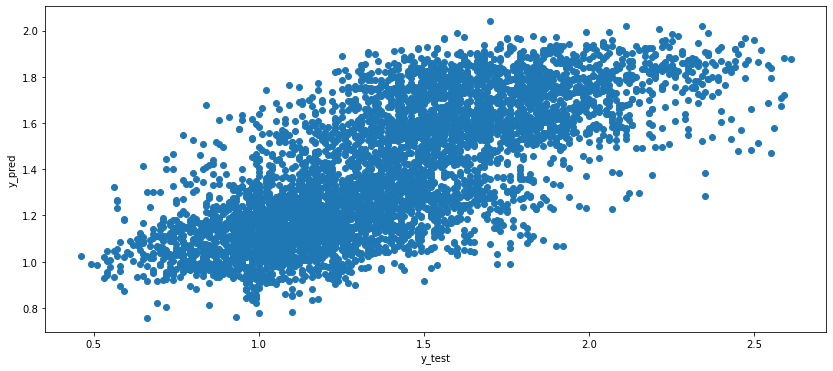

In [158]:
# # plotting original training data wth predicted values for LinearRegression model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_dt)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
# We dont have a straight line.So it does not seem to be the best model.Lets check other models

In [178]:
# Evaluation of models

#Training model with RandomForestRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_rfr = RandomForestRegressor()

score_s=0
state=0
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_rfr.fit(X_train, y_train)
    y_pred_rfr = model_rfr.predict(X_test)
    score=r2_score(y_test,y_pred_rfr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  6
best r2 score :  0.8557008992452446


In [179]:
# finding mean_squared_error,rmse  for RandomForestRegressor

mse=mean_squared_error(y_test,y_pred_rfr)
rmse=np.sqrt(mse)

rmse

0.15364449174317965

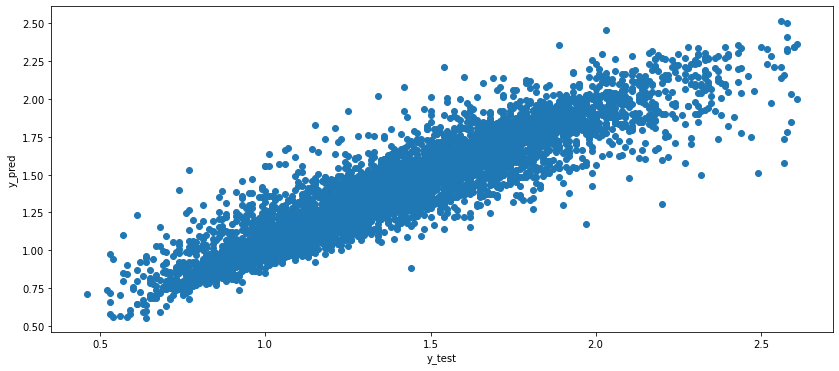

In [180]:
# # plotting original training data wth predicted values for RandomForestRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_rfr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [209]:
# Evaluation of models

#Training model with KNeighborsRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_knr = KNeighborsRegressor()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_knr.fit(X_train, y_train)
    y_pred_knr = model_knr.predict(X_test)
    score=r2_score(y_test,y_pred_knr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  6
best r2 score :  0.8344858959219892


In [210]:
# finding mean_squared_error,rmse  for KNeighborsRegressor

mse=mean_squared_error(y_test,y_pred_knr)
rmse=np.sqrt(mse)

rmse

0.15985248993553688

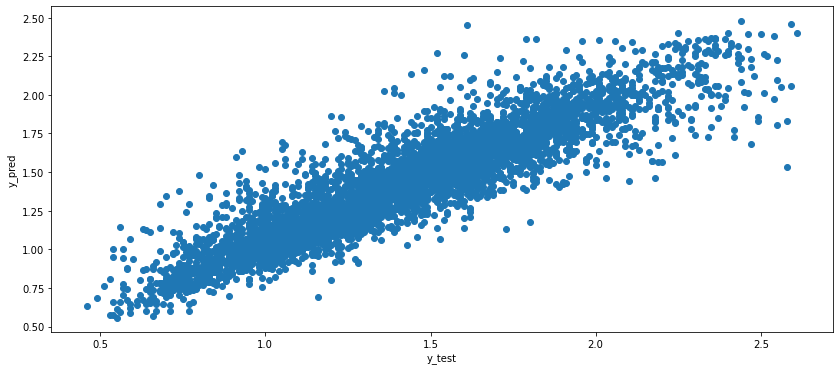

In [184]:
# # plotting original training data wth predicted values for KNeighborsRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_knr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
# KNeighborsRegressor  and RandomForestRegressor root_mean_squared_error looks very close.We will go with
# KNeighborsRegressor for GridSearchCV

In [211]:
# HyperParameterTuning with  KNeighborsRegressor

from sklearn.model_selection import  GridSearchCV, KFold

param_grid = {'n_neighbors': np.arange(1, 12, 2),
              'weights': ['uniform', 'distance']}


knn = KNeighborsRegressor(metric='euclidean')
gscv = GridSearchCV(knn, param_grid, cv=KFold(n_splits=3,
                                              shuffle=True, random_state=0))
gscv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11]),
                         'weights': ['uniform', 'distance']})

In [212]:
gscv.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [213]:

print("Best score", gscv.best_score_)

Best score 0.8076893358987823


In [214]:
gscv.score(X_test,y_test)

0.8448827845366316

In [215]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
y_pred_knr=knr.predict(X_test)
score=r2_score(y_test,y_pred_knr)
score

0.8353892625050664

In [218]:
mse=mean_squared_error(y_test,y_pred_knr)
print("mse :",mse)

mse : 0.02415310741502108


In [219]:
rmse=np.sqrt(mse)
print("rmse :",rmse)

rmse : 0.1554127003015554


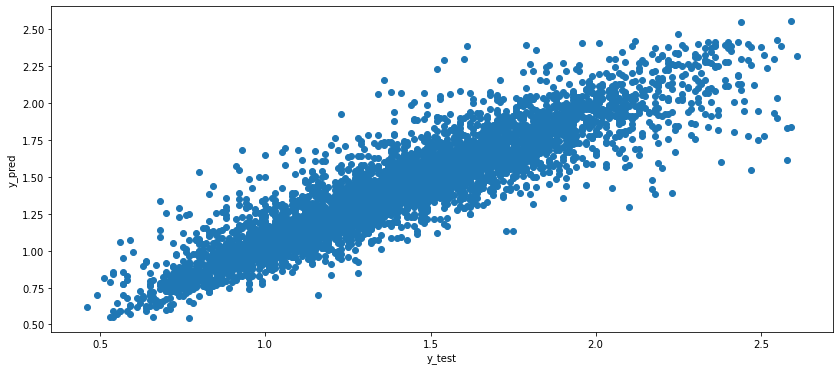

In [220]:
# # plotting original training data wth predicted values for KNeighborsRegressor model after HyperPparameterTuning

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_knr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
# plotted the scatter plot graph and we can see that the actual value and predicted values are very close to each other, 
# so the line is best fit line.

In [ ]:
# finding the score by taking 'region' as traget variable
#We will classification models as region is a categorical variable

In [270]:
# importing libraries for classifier modelling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [271]:
# assigning values to x and y for train test split phase

X_1=df.drop(['region'],axis=1)
y_1=df.region

In [272]:
X_1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015


In [273]:
# Scaling the dataset so that it becomes normally distributed

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X_features_1=X_1
X_1= scale.fit_transform(X_1)

In [243]:
# Evaluating models

# Training the model using LogisticRegression and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_lr_1 = LogisticRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X_1,y_1,test_size=0.3, random_state =i)
    model_lr_1.fit(X_train, y_train)
    y_pred_lr_1 = model_lr_1.predict(X_test)
    score=accuracy_score(y_test,y_pred_lr_1)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  2
best accuracy score :  0.5557990867579908


In [244]:
# finding classification_report for LogisticRegression

print(classification_report(y_test, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67       115
           1       0.22      0.35      0.27       100
           2       0.77      0.59      0.67       100
           3       0.65      0.37      0.47       107
           4       0.55      0.48      0.51       115
           5       0.49      0.48      0.49        96
           6       0.93      0.93      0.93       108
           7       0.50      0.72      0.59       101
           8       0.72      0.74      0.73       101
           9       0.52      0.76      0.62       105
          10       0.50      0.47      0.48        98
          11       0.55      0.66      0.60        98
          12       0.51      0.49      0.50       111
          13       0.33      0.26      0.29       103
          14       0.51      0.53      0.52        97
          15       0.72      0.76      0.74        94
          16       0.45      0.37      0.41        99
          17       0.55    

In [245]:
# finding cross validation score

accuracy = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.49369220299176664


In [247]:
# Training the model using DecisionTreeClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_dtc = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X_1,y_1,test_size=0.3, random_state =i)
    model_dtc.fit(X_train, y_train)
    y_pred_dtc = model_dtc.predict(X_test)
    score=accuracy_score(y_test,y_pred_dtc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  11
best accuracy score :  0.7987214611872147


In [248]:
# finding classification_report for DecisionTreeClassifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       115
           1       0.74      0.74      0.74       100
           2       0.89      0.87      0.88       100
           3       0.87      0.78      0.82       107
           4       0.82      0.81      0.81       115
           5       0.74      0.71      0.72        96
           6       0.93      0.94      0.93       108
           7       0.82      0.78      0.80       101
           8       0.95      0.95      0.95       101
           9       0.87      0.80      0.83       105
          10       0.69      0.76      0.72        98
          11       0.83      0.92      0.87        98
          12       0.84      0.80      0.82       111
          13       0.72      0.69      0.71       103
          14       0.70      0.75      0.72        97
          15       0.94      0.97      0.95        94
          16       0.85      0.92      0.88        99
          17       0.74    

In [249]:
# finding cross validation score for (DecisionTreeClassifier

accuracy = cross_val_score(DecisionTreeClassifier(random_state=11), X_test, y_test, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.7210908205340343


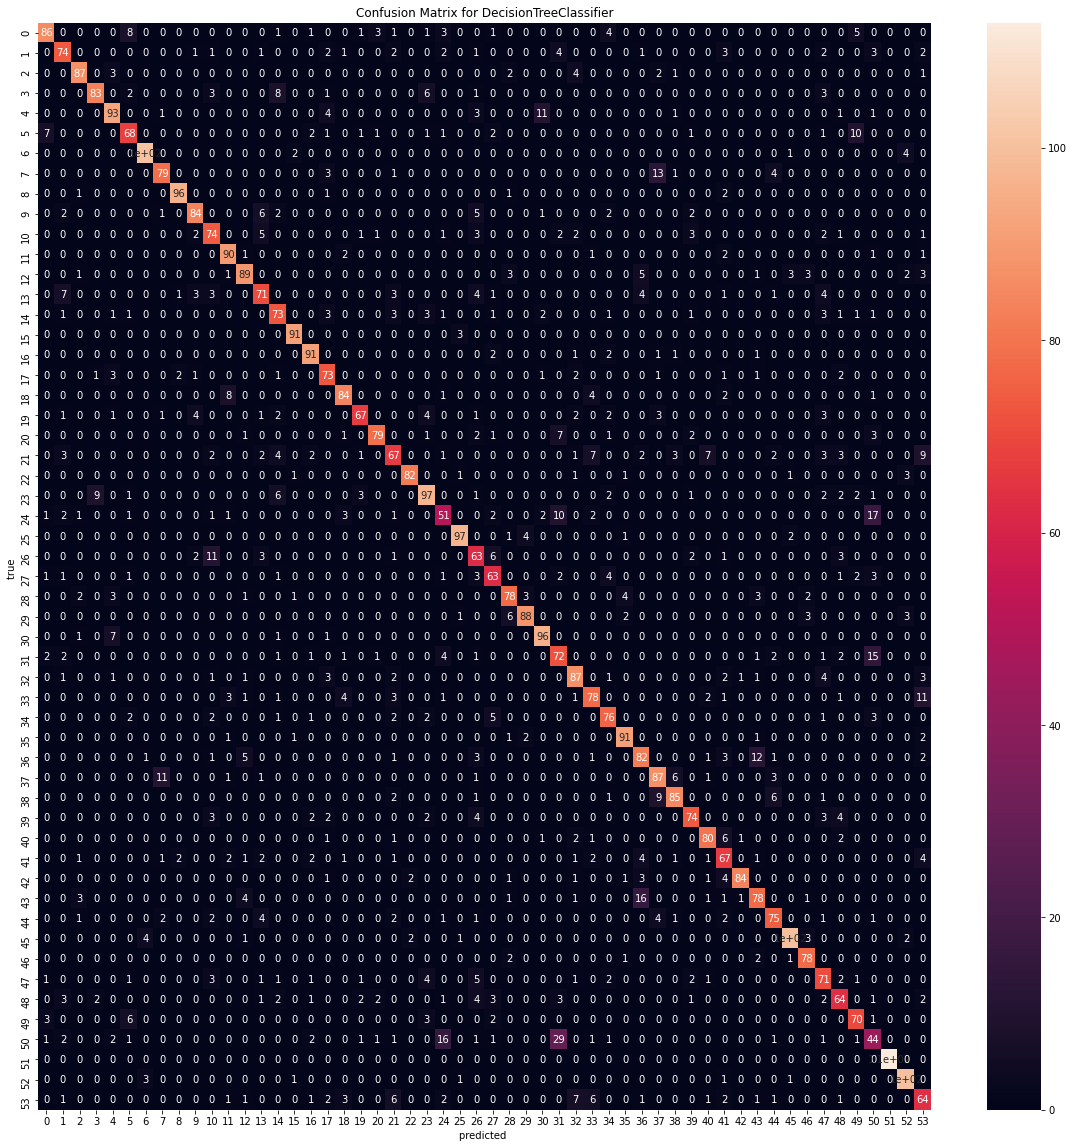

In [251]:
# confusion matrix of DecisionTreeClassifier  model

cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [274]:
# Training the model using  KNeighborsClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_knc = KNeighborsClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X_1,y_1,test_size=0.3, random_state =i)
    model_knc.fit(X_train, y_train)
    y_pred_knc = model_knc.predict(X_test)
    score=accuracy_score(y_test,y_pred_knc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  5
best accuracy score :  0.8421917808219178


In [275]:
# finding classification_report for KNeighborsClassifier

print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       115
           1       0.66      0.77      0.71       100
           2       0.93      0.95      0.94       100
           3       0.78      0.82      0.80       107
           4       0.89      0.84      0.87       115
           5       0.79      0.79      0.79        96
           6       0.94      0.94      0.94       108
           7       0.76      0.86      0.81       101
           8       0.97      0.91      0.94       101
           9       0.70      0.78      0.74       105
          10       0.73      0.80      0.76        98
          11       0.76      0.93      0.83        98
          12       0.93      0.89      0.91       111
          13       0.75      0.67      0.71       103
          14       0.86      0.84      0.85        97
          15       0.97      0.98      0.97        94
          16       0.91      0.86      0.89        99
          17       0.82    

In [276]:
# finding cross validation score for  KNeighborsClassifier

accuracy = cross_val_score( KNeighborsClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.71250650529097


In [ ]:
# So  KNeighborsClassifier is the best model for predicting 'region' problem

In [277]:
# HyperParameterTuning for  KNeighborsClassifier

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_range = list(range(1, 31))
param_grid = dict(n_neighbors=knn_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
#GCV.fit(x_train,y_train)
grid.best_params_  # Printing the best parameter found by GridSearchCV



Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'n_neighbors': 1}

In [279]:

GCV_pred=grid.best_estimator_.predict(X_test)   # predicting the best parameters
accuracy_score(y_test,GCV_pred)    # checking final accuracy


0.8741552511415525

In [ ]:
# Final accuracy_score clearly states that KNeighborsClassifier model is very good enough to predict 'region'

In [294]:
# AUC_ROC curve

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state=5 ,test_size=0.3)

knc_1 = KNeighborsClassifier(n_neighbors=1)
knc_1.fit(X_train,y_train)
y_predicted_knc=knc_1.predict_proba(X_test)[:,1]



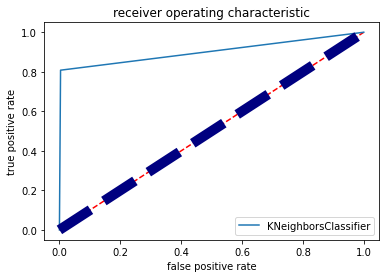

In [295]:

fpr,tpr,thresholds=roc_curve(y_test,y_predicted_knc,pos_label=True)

plt.figure()
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()